In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
# for modeling
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Cleaning the dataset
panda = pd.read_excel("lp4.xlsx")
pd1 = (panda['position']).dropna().to_list()
pd2 = panda[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].dropna()
arr = np.array(pd2).flatten().reshape(164,90)
df = pd.DataFrame(arr)
df['position'] = pd1
df.to_csv("fifth_dataset.csv")

In [2]:
df = pd.read_csv('fifth_dataset.csv')
# split into X and Y
X = df.drop(['position'], axis=1)
Y = df['position']

# convert to numpy arrays
X = np.array(X)

(array([44.,  0., 26.,  0.,  0., 47.,  0., 21.,  0., 26.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

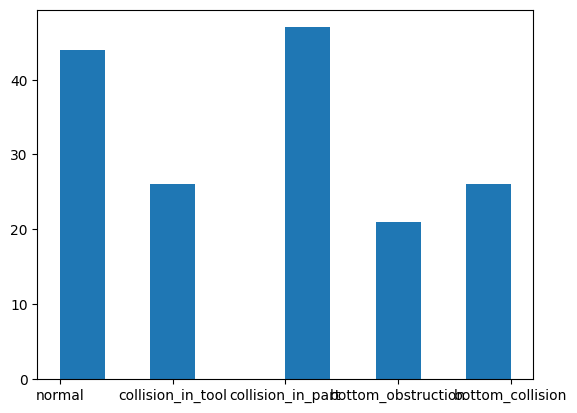

In [258]:
plt.hist(df['position'])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=20)

In [4]:
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Naive Bayes

In [5]:

from sklearn.naive_bayes import GaussianNB

In [262]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

  bottom_collision       1.00      0.25      0.40         4
bottom_obstruction       0.40      1.00      0.57         2
 collision_in_part       0.64      0.78      0.70         9
 collision_in_tool       0.80      0.57      0.67         7
            normal       1.00      1.00      1.00        11

          accuracy                           0.76        33
         macro avg       0.77      0.72      0.67        33
      weighted avg       0.82      0.76      0.75        33



KNN model  

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [273]:
df["position"] = (df["position"] == "bottom_collisoin").astype(int)
df["position"] = (df["position"] == "bottom_obstruction").astype(int)
df["position"] = (df["position"] == "colllision_in_part").astype(int)
df["position"] = (df["position"] == "collision_in_tool").astype(int)
df["position"] = (df["position"] == "normal").astype(int)

In [275]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=20)

In [288]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

  bottom_collision       0.80      1.00      0.89         4
bottom_obstruction       1.00      1.00      1.00         2
 collision_in_part       0.62      0.56      0.59         9
 collision_in_tool       0.67      0.29      0.40         7
            normal       0.73      1.00      0.85        11

          accuracy                           0.73        33
         macro avg       0.76      0.77      0.74        33
      weighted avg       0.71      0.73      0.70        33



Randomforest

In [289]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
clf = RandomForestClassifier(criterion='gini', max_depth=8,min_samples_split=10,random_state=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [291]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

  bottom_collision       1.00      0.75      0.86         4
bottom_obstruction       0.67      1.00      0.80         2
 collision_in_part       0.62      0.89      0.73         9
 collision_in_tool       0.50      0.14      0.22         7
            normal       0.92      1.00      0.96        11

          accuracy                           0.76        33
         macro avg       0.74      0.76      0.71        33
      weighted avg       0.74      0.76      0.72        33



In [292]:
confusion_matrix(y_test, y_pred)

array([[ 3,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  8,  1,  0],
       [ 0,  0,  5,  1,  1],
       [ 0,  0,  0,  0, 11]], dtype=int64)

Artificial neural network

In [6]:
#one hot encoding

Y.head()
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.20, random_state = 20)

In [8]:
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
# build a model
import tensorflow as tf
model = Sequential()
model.add(Dense(300, input_shape=(x_train.shape[1],), activation='relu')) # input shape is (features,)
#model.add(Dense(300, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

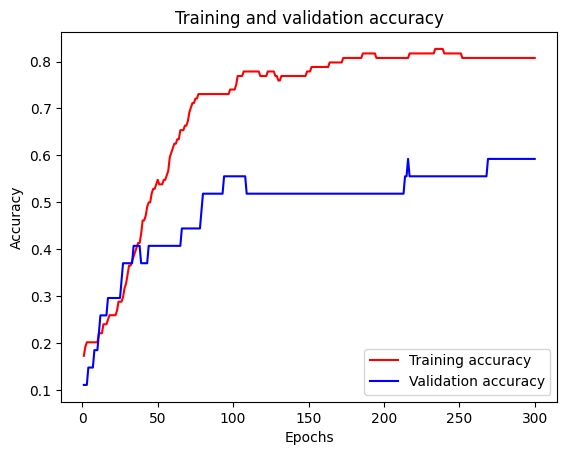

In [43]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=300, # you can set this to a big number!
                    batch_size=8,
                    shuffle=True,
                    validation_split=0.20,
                    verbose=0)


history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:

y_pred = model.predict(x_test) # see how the model did!
print(y_pred[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(y_pred[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y




2/2 [==============================] - 0s 2ms/step
[0.2211761  0.09743713 0.3757039  0.1908795  0.11480337]
0.99999994


array([[ 2,  0,  1,  1,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  0,  4,  2,  3],
       [ 0,  0,  4,  1,  2],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [45]:
# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.50      0.67         2
           2       0.44      0.44      0.44         9
           3       0.25      0.14      0.18         7
           4       0.69      1.00      0.81        11

    accuracy                           0.58        33
   macro avg       0.61      0.52      0.54        33
weighted avg       0.54      0.58      0.54        33



In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix